In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
# load data

income = spark.read.option("inferSchema", "true").csv("income_evaluation.csv", header = True)

income.show()

+---+-----------------+-------+-------------+--------------+--------------------+------------------+--------------+-------------------+-------+-------------+-------------+---------------+---------------+-------+
|age|        workclass| fnlwgt|    education| education-num|      marital-status|        occupation|  relationship|               race|    sex| capital-gain| capital-loss| hours-per-week| native-country| income|
+---+-----------------+-------+-------------+--------------+--------------------+------------------+--------------+-------------------+-------+-------------+-------------+---------------+---------------+-------+
| 39|        State-gov|  77516|    Bachelors|            13|       Never-married|      Adm-clerical| Not-in-family|              White|   Male|         2174|            0|             40|  United-States|  <=50K|
| 50| Self-emp-not-inc|  83311|    Bachelors|            13|  Married-civ-spouse|   Exec-managerial|       Husband|              White|   Male|         

In [ ]:
# select feature

income = income.select("age", " workclass", " fnlwgt", " education", " education-num", " marital-status", " occupation", " relationship", " race",
                       " sex", " capital-gain", " capital-loss", " hours-per-week", " native-country", " income")

income.show()

+---+-----------------+-------+-------------+--------------+--------------------+------------------+--------------+-------------------+-------+-------------+-------------+---------------+---------------+-------+
|age|        workclass| fnlwgt|    education| education-num|      marital-status|        occupation|  relationship|               race|    sex| capital-gain| capital-loss| hours-per-week| native-country| income|
+---+-----------------+-------+-------------+--------------+--------------------+------------------+--------------+-------------------+-------+-------------+-------------+---------------+---------------+-------+
| 39|        State-gov|  77516|    Bachelors|            13|       Never-married|      Adm-clerical| Not-in-family|              White|   Male|         2174|            0|             40|  United-States|  <=50K|
| 50| Self-emp-not-inc|  83311|    Bachelors|            13|  Married-civ-spouse|   Exec-managerial|       Husband|              White|   Male|         

In [ ]:
from pyspark.sql.functions import when

In [ ]:
def toNull(df, str):

    df = df.withColumn(str, when(df[str] == " ?", None).
                            otherwise(df[str]))

    return df

In [ ]:
income = toNull(income, "age")
income = toNull(income, " workclass")
income = toNull(income, " fnlwgt")
income = toNull(income, " education")
income = toNull(income, " education-num")
income = toNull(income, " marital-status")
income = toNull(income, " occupation")
income = toNull(income, " relationship")
income = toNull(income, " race")
income = toNull(income, " sex")
income = toNull(income, " capital-gain")
income = toNull(income, " capital-loss")
income = toNull(income, " hours-per-week")
income = toNull(income, " native-country")
income = toNull(income, " income")

income.show()

+---+-----------------+-------+-------------+--------------+--------------------+------------------+--------------+-------------------+-------+-------------+-------------+---------------+---------------+-------+
|age|        workclass| fnlwgt|    education| education-num|      marital-status|        occupation|  relationship|               race|    sex| capital-gain| capital-loss| hours-per-week| native-country| income|
+---+-----------------+-------+-------------+--------------+--------------------+------------------+--------------+-------------------+-------+-------------+-------------+---------------+---------------+-------+
| 39|        State-gov|  77516|    Bachelors|            13|       Never-married|      Adm-clerical| Not-in-family|              White|   Male|         2174|            0|             40|  United-States|  <=50K|
| 50| Self-emp-not-inc|  83311|    Bachelors|            13|  Married-civ-spouse|   Exec-managerial|       Husband|              White|   Male|         

In [ ]:
# Data
income = income.na.drop()

In [ ]:
income.show(10)

+---+-----------------+-------+----------+--------------+--------------------+------------------+--------------+------+-------+-------------+-------------+---------------+---------------+-------+
|age|        workclass| fnlwgt| education| education-num|      marital-status|        occupation|  relationship|  race|    sex| capital-gain| capital-loss| hours-per-week| native-country| income|
+---+-----------------+-------+----------+--------------+--------------------+------------------+--------------+------+-------+-------------+-------------+---------------+---------------+-------+
| 39|        State-gov|  77516| Bachelors|            13|       Never-married|      Adm-clerical| Not-in-family| White|   Male|         2174|            0|             40|  United-States|  <=50K|
| 50| Self-emp-not-inc|  83311| Bachelors|            13|  Married-civ-spouse|   Exec-managerial|       Husband| White|   Male|            0|            0|             13|  United-States|  <=50K|
| 38|          Priva

In [ ]:
# transform data

def transform(df):

    df = df.withColumn(" marital-status",   when(df[" marital-status"] == " Married-civ-spouse", 0).
                                            when(df[" marital-status"] == " Never-married", 1).
                                            when(df[" marital-status"] == " Divorced", 2).
                                            when(df[" marital-status"] == " Separated", 3).
                                            when(df[" marital-status"] == " Widowed", 4).
                                            when(df[" marital-status"] == " Married-spouse-absent", 5).
                                            when(df[" marital-status"] == " Married-AF-spouse", 6))

    df = df.withColumn(" occupation",       when(df[" occupation"] == " Tech-support, Craft-repair", 0).
                                            when(df[" occupation"] == " Other-service", 1).
                                            when(df[" occupation"] == " Sales", 2).
                                            when(df[" occupation"] == " Exec-managerial", 3).
                                            when(df[" occupation"] == " Prof-specialty", 4).
                                            when(df[" occupation"] == " Handlers-cleaners", 5).
                                            when(df[" occupation"] == " Machine-op-inspct", 6).
                                            when(df[" occupation"] == " Adm-clerical", 7).
                                            when(df[" occupation"] == " Farming-fishing", 8).
                                            when(df[" occupation"] == " Transport-moving", 9).
                                            when(df[" occupation"] == " Priv-house-serv", 10).
                                            when(df[" occupation"] == " Protective-serv", 11).
                                            when(df[" occupation"] == " Armed-Forces", 12))

    df = df.withColumn(" relationship",     when(df[" relationship"] == " Wife", 0).
                                            when(df[" relationship"] == " Own-child", 1).
                                            when(df[" relationship"] == " Husband", 2).
                                            when(df[" relationship"] == " Not-in-family", 3).
                                            when(df[" relationship"] == " Other-relative", 4).
                                            when(df[" relationship"] == " Unmarried", 5))

    df = df.withColumn(" race",             when(df[" race"] == " White", 0).
                                            when(df[" race"] == " Asian-Pac-Islander", 1).
                                            when(df[" race"] == " Amer-Indian-Eskimo", 2).
                                            when(df[" race"] == " Other", 3).
                                            when(df[" race"] == " Black", 4))

    df = df.withColumn(" sex",              when(df[" sex"] == " Male", 0).
                                            when(df[" sex"] == " Female", 1))

    df = df.withColumn(" workclass",        when(df[" workclass"] == " Never-worked", 0).
                                            when(df[" workclass"] == " Without-pay", 1).
                                            when(df[" workclass"] == " Local-gov", 2).
                                            when(df[" workclass"] == " State-gov", 3).
                                            when(df[" workclass"] == " Federal-gov", 4).
                                            when(df[" workclass"] == " Self-emp-inc", 5).
                                            when(df[" workclass"] == " Self-emp-not-inc", 6).
                                            when(df[" workclass"] == " Private", 7))

    df = df.withColumn(" education",        when(df[" education"] == " Preschool", 0).
                                            when(df[" education"] == " 1st-4th", 1).
                                            when(df[" education"] == " 5th-6th", 2).
                                            when(df[" education"] == " 7th-8th", 3).
                                            when(df[" education"] == " 9th", 4).
                                            when(df[" education"] == " 10th", 5).
                                            when(df[" education"] == " 11th", 6).
                                            when(df[" education"] == " 12th", 7).
                                            when(df[" education"] == " HS-grad", 8).
                                            when(df[" education"] == " Some-college", 9).
                                            when(df[" education"] == " Assoc-voc", 10).
                                            when(df[" education"] == " Assoc-acdm", 11).
                                            when(df[" education"] == " Bachelors", 12).
                                            when(df[" education"] == " Masters", 13).
                                            when(df[" education"] == " Doctorate", 14).
                                            when(df[" education"] == " Prof-school", 15))

    df = df.withColumn(" native-country",   when(df[" native-country"] == " United-States", 0).
                                            when(df[" native-country"] == " Cambodia", 1).
                                            when(df[" native-country"] == " Puerto-Rico", 2).
                                            when(df[" native-country"] == " Canada", 3).
                                            when(df[" native-country"] == " Germany", 4).
                                            when(df[" native-country"] == " Outlying-US(Guam-USVI-etc)", 5).
                                            when(df[" native-country"] == " India", 6).
                                            when(df[" native-country"] == " Japan", 7).
                                            when(df[" native-country"] == " Greece", 8).
                                            when(df[" native-country"] == " China", 9).
                                            when(df[" native-country"] == " Cuba", 10).
                                            when(df[" native-country"] == " Iran", 11).
                                            when(df[" native-country"] == " Honduras", 12).
                                            when(df[" native-country"] == " Philipines", 13).
                                            when(df[" native-country"] == " Italy", 14).
                                            when(df[" native-country"] == " Poland", 15).
                                            when(df[" native-country"] == " Jamaica", 16).
                                            when(df[" native-country"] == " Vietnam", 17).
                                            when(df[" native-country"] == " Mexico", 18).
                                            when(df[" native-country"] == " Portugal", 19).
                                            when(df[" native-country"] == " Ireland", 20).
                                            when(df[" native-country"] == " France", 21).
                                            when(df[" native-country"] == " Dominican-Republic", 22).
                                            when(df[" native-country"] == " Laos", 23).
                                            when(df[" native-country"] == " Ecuador", 24).
                                            when(df[" native-country"] == " Taiwan", 25).
                                            when(df[" native-country"] == " Haiti", 26).
                                            when(df[" native-country"] == " Columbia", 27).
                                            when(df[" native-country"] == " Hungary", 28).
                                            when(df[" native-country"] == " Guatemala", 29).
                                            when(df[" native-country"] == " Nicaragua", 30).
                                            when(df[" native-country"] == " Scotland", 31).
                                            when(df[" native-country"] == " Thailand", 32).
                                            when(df[" native-country"] == " Yugoslavia", 33).
                                            when(df[" native-country"] == " El-Salvador", 34).
                                            when(df[" native-country"] == " Trinadad&Tobago", 35).
                                            when(df[" native-country"] == " Peru", 36).
                                            when(df[" native-country"] == " Hong", 37).
                                            when(df[" native-country"] == " Holand-Netherlands", 38).
                                            when(df[" native-country"] == " South", 39))

    df = df.withColumn(" income",           when(df[" income"] == " <=50K", 0).
                                            when(df[" income"] == " >50K", 1))

    return df

In [ ]:
income = transform(income)

income.show()

+---+----------+-------+----------+--------------+---------------+-----------+-------------+-----+----+-------------+-------------+---------------+---------------+-------+
|age| workclass| fnlwgt| education| education-num| marital-status| occupation| relationship| race| sex| capital-gain| capital-loss| hours-per-week| native-country| income|
+---+----------+-------+----------+--------------+---------------+-----------+-------------+-----+----+-------------+-------------+---------------+---------------+-------+
| 39|         3|  77516|        12|            13|              1|          7|            3|    0|   0|         2174|            0|             40|              0|      0|
| 50|         6|  83311|        12|            13|              0|          3|            2|    0|   0|            0|            0|             13|              0|      0|
| 38|         7| 215646|         8|             9|              2|          5|            3|    0|   0|            0|            0|         

In [ ]:
income = income.na.drop()

In [ ]:
from pyspark.sql.functions import col

In [ ]:
# Normalization

from pyspark.ml.feature import VectorAssembler, StandardScaler

In [ ]:
def normalize(df):
    cols = df.columns
    cols.remove(" income")

    df = VectorAssembler(inputCols = cols, outputCol = "Vector Features").transform(df)
    df = StandardScaler(inputCol = "Vector Features", outputCol = "features").fit(df).transform(df)

    return df

income = normalize(income)

income.show(10)

+---+----------+-------+----------+--------------+---------------+-----------+-------------+-----+----+-------------+-------------+---------------+---------------+-------+--------------------+--------------------+
|age| workclass| fnlwgt| education| education-num| marital-status| occupation| relationship| race| sex| capital-gain| capital-loss| hours-per-week| native-country| income|     Vector Features|            features|
+---+----------+-------+----------+--------------+---------------+-----------+-------------+-----+----+-------------+-------------+---------------+---------------+-------+--------------------+--------------------+
| 39|         3|  77516|        12|            13|              1|          7|            3|    0|   0|         2174|            0|             40|              0|      0|[39.0,3.0,77516.0...|[2.90764069989437...|
| 50|         6|  83311|        12|            13|              0|          3|            2|    0|   0|            0|            0|             

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
model = LogisticRegression(featuresCol = "Vector Features", labelCol = " income", maxIter = 10).fit(income)
prediction = model.transform(income)

prediction.select("age", " workclass", " fnlwgt", " education", " education-num", " marital-status", " occupation", " relationship", " race",
                       " sex", " capital-gain", " capital-loss", " hours-per-week", " native-country", " income", "prediction").show(10)

+---+----------+-------+----------+--------------+---------------+-----------+-------------+-----+----+-------------+-------------+---------------+---------------+-------+----------+
|age| workclass| fnlwgt| education| education-num| marital-status| occupation| relationship| race| sex| capital-gain| capital-loss| hours-per-week| native-country| income|prediction|
+---+----------+-------+----------+--------------+---------------+-----------+-------------+-----+----+-------------+-------------+---------------+---------------+-------+----------+
| 39|         3|  77516|        12|            13|              1|          7|            3|    0|   0|         2174|            0|             40|              0|      0|       0.0|
| 50|         6|  83311|        12|            13|              0|          3|            2|    0|   0|            0|            0|             13|              0|      0|       0.0|
| 38|         7| 215646|         8|             9|              2|          5|       

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=" income")
accuracy = evaluator.evaluate(prediction)

print(accuracy)

0.8907103442745666


In [ ]:
import matplotlib.pyplot as plt

predictions = prediction.toPandas()

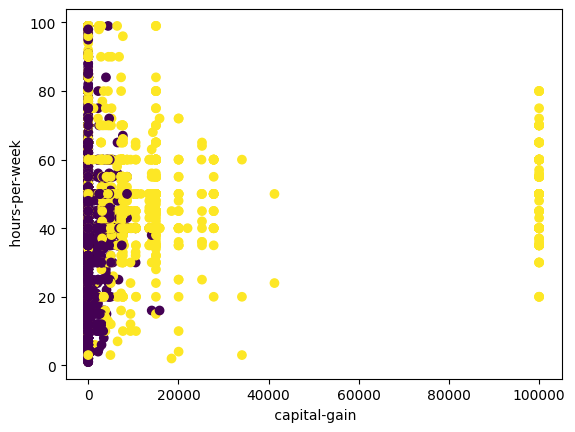

In [ ]:
plt.scatter(predictions[" capital-gain"], predictions[" hours-per-week"], c = predictions["prediction"])
plt.xlabel(" capital-gain")
plt.ylabel(" hours-per-week")
plt.show()

In [ ]:
import pyspark.sql.functions as F

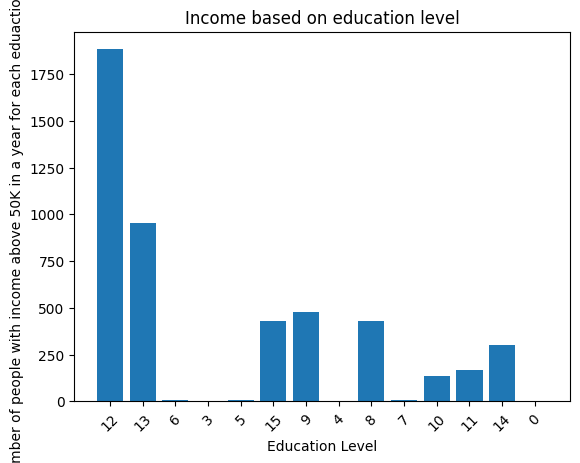

In [ ]:
education_prediction = prediction.select(" education", "prediction")

counts = education_prediction.filter(F.col("prediction") == 1).groupBy(" education").count().collect()

education_levels = [row[" education"] for row in counts]
count_values = [row["count"] for row in counts]

x_labels = range(len(education_levels))

plt.bar(x_labels, count_values)
plt.xticks(x_labels, education_levels, rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Number of people with income above 50K in a year for each eduaction level')
plt.title('Income based on education level')

# Display the plot
plt.show()


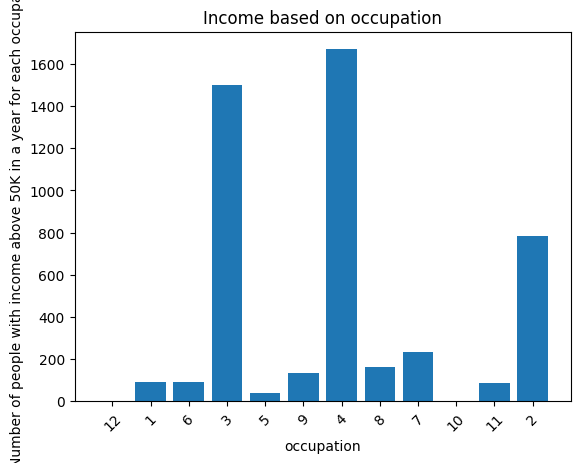

In [ ]:
occupation_prediction = prediction.select(" occupation", "prediction")

counts = occupation_prediction.filter(F.col("prediction") == 1).groupBy(" occupation").count().collect()

occupation = [row[" occupation"] for row in counts]
count_values = [row["count"] for row in counts]

x_labels = range(len(occupation))

plt.bar(x_labels, count_values)
plt.xticks(x_labels, occupation, rotation=45)
plt.xlabel('occupation')
plt.ylabel('Number of people with income above 50K in a year for each occupation')
plt.title('Income based on occupation')

# Display the plot
plt.show()

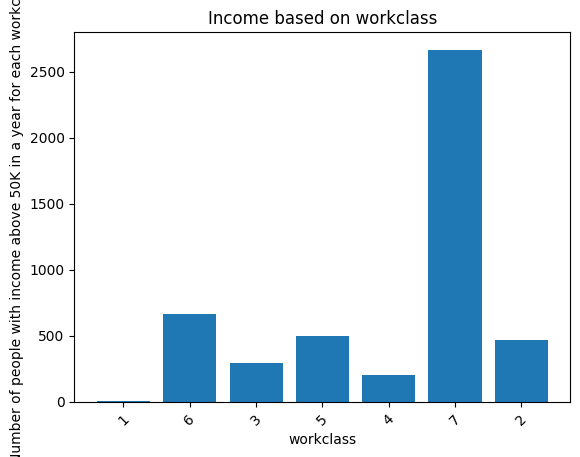

In [ ]:
workclass_prediction = prediction.select(" workclass", "prediction")

counts = workclass_prediction.filter(F.col("prediction") == 1).groupBy(" workclass").count().collect()

workclass = [row[" workclass"] for row in counts]
count_values = [row["count"] for row in counts]

x_labels = range(len(workclass))

plt.bar(x_labels, count_values)
plt.xticks(x_labels, workclass, rotation=45)
plt.xlabel('workclass')
plt.ylabel('Number of people with income above 50K in a year for each workclass')
plt.title('Income based on workclass')

# Display the plot
plt.show()

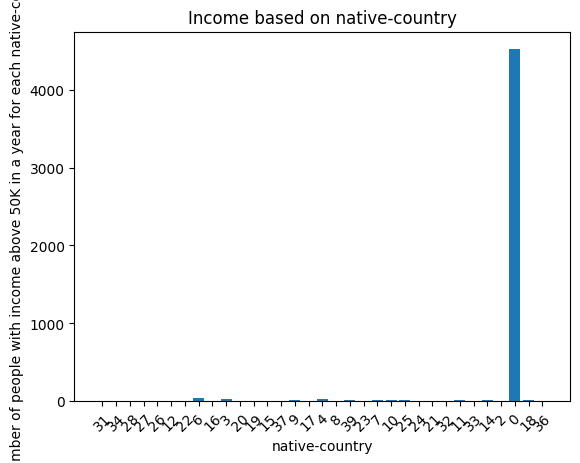

In [ ]:
native_country_prediction = prediction.select(" native-country", "prediction")

counts = native_country_prediction.filter(F.col("prediction") == 1).groupBy(" native-country").count().collect()

native_country = [row[" native-country"] for row in counts]
count_values = [row["count"] for row in counts]

x_labels = range(len(native_country))

plt.bar(x_labels, count_values)
plt.xticks(x_labels, native_country, rotation=45)
plt.xlabel('native-country')
plt.ylabel('Number of people with income above 50K in a year for each native-country')
plt.title('Income based on native-country')

# Display the plot
plt.show()

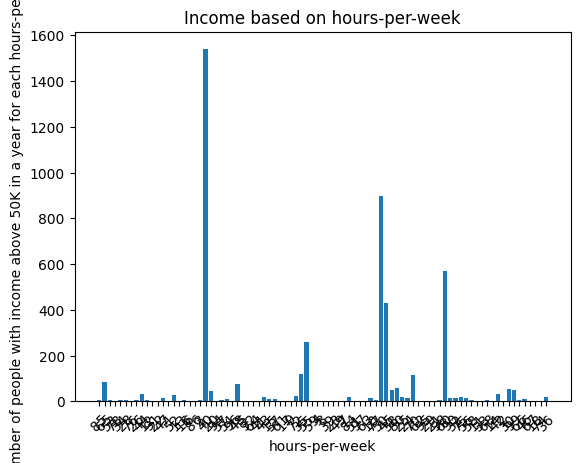

In [ ]:
hours_per_week_prediction = prediction.select(" hours-per-week", "prediction")

counts = hours_per_week_prediction.filter(F.col("prediction") == 1).groupBy(" hours-per-week").count().collect()

hours_per_week = [row[" hours-per-week"] for row in counts]
count_values = [row["count"] for row in counts]

x_labels = range(len(hours_per_week))

plt.bar(x_labels, count_values)
plt.xticks(x_labels, hours_per_week, rotation=45)
plt.xlabel('hours-per-week')
plt.ylabel('Number of people with income above 50K in a year for each hours-per-week')
plt.title('Income based on hours-per-week')

# Display the plot
plt.show()